---
execute: 
    echo: false
    enabled: true
---

In [1]:
import json 
import glob
import torch
import pandas as pd
from IPython.display import display,Markdown

from shapesynthesis.plotting import plot_recon_2d, plot_recon_3d

In [2]:
def model_to_cate(model):
    name = model.split("_")[-1]
    return name.title()


def model_to_modelname(model):
    name_list = model.split("_")[:-1]
    name = " ".join(name_list)
    return name.title()

# Reconstruction of MNIST and ShapeNetCore

The encoder is the `encoder_sparse` and the rendered model is the point cloud
optimization rendering (a non-parametric method). The latter clearly outperforms 
all models.  

In [3]:

fn = glob.glob("./results/**/**.json")
results = []
for filename in fn:
    with open(filename,"r") as f:
        results.extend(json.load(f))

df = pd.DataFrame(results)
df = df.drop(["fscore","normalized"],axis=1)
df["MMD-CD"] *= 1e4 
df["MMD-EMD"] *= 1e3 

df["dataset"] = df["model"].apply(model_to_cate)
df["model"] = df["model"].apply(model_to_modelname)
df = df.groupby(by=["model","dataset"]).agg(["mean"])

df = df.unstack().swaplevel(1,2,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1)

display(df)


dataset          Airplane                 Car                Chair             \
                   MMD-CD   MMD-EMD    MMD-CD    MMD-EMD    MMD-CD    MMD-EMD   
                     mean      mean      mean       mean      mean       mean   
model                                                                           
Encoder          1.003551  4.434669  6.006771   9.393849  9.626629  17.237462   
Encoder Chamfer  0.978317  9.759554  6.043088  13.437557  9.774287  24.118090   
Rendered         0.316157  0.116938  0.889835   0.273740  0.683799   0.221733   

dataset              Mnist             
                    MMD-CD    MMD-EMD  
                      mean       mean  
model                                  
Encoder          48.546912  57.837475  
Encoder Chamfer        NaN        NaN  
Rendered               NaN        NaN

# Model outputs

In [4]:
def visualize_2d_model(model):
    recon_pcs = torch.load(f'./results/{model}/reconstructions.pt').cpu().detach().squeeze().numpy()
    reference_pcs = torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_2d(recon_pcs=recon_pcs,ref_pcs=reference_pcs)

def visualize_3d_model(model,scale=1.0):
    recon_pcs = scale*torch.load(f'./results/{model}/reconstructions.pt').cpu().detach().squeeze().numpy()
    reference_pcs = scale*torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_3d(recon_pcs=recon_pcs,ref_pcs=reference_pcs)

## MNIST

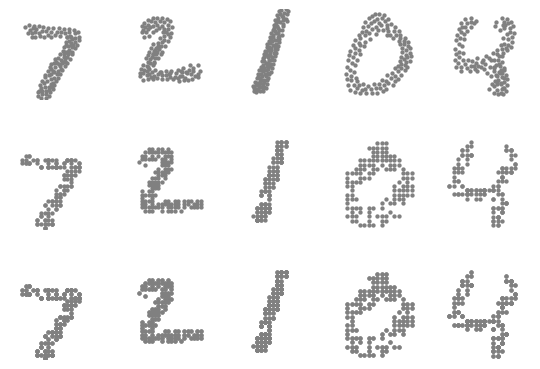

In [5]:
visualize_2d_model("encoder_mnist")

## CNN Encoder Chair 

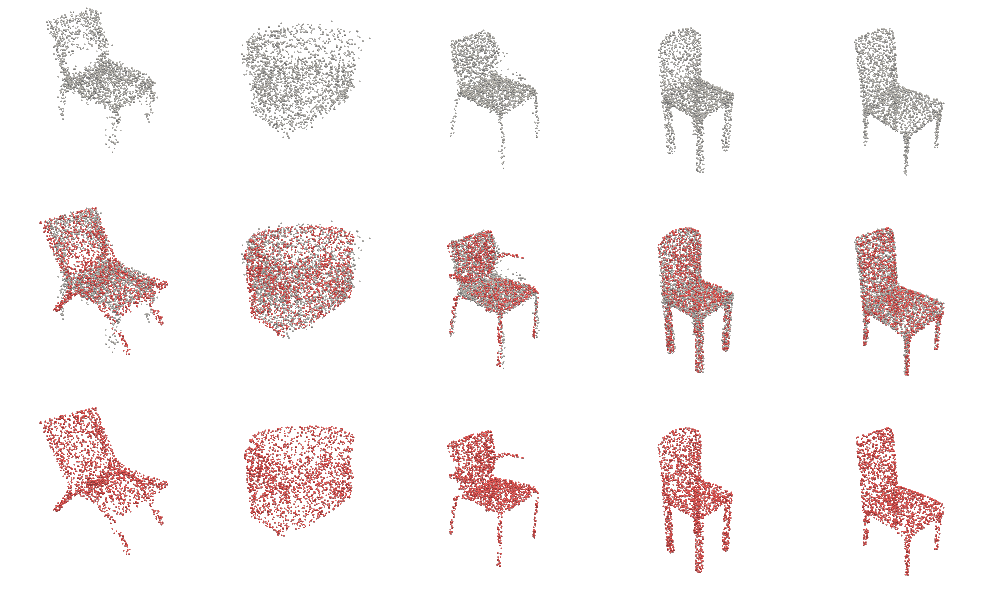

In [6]:
visualize_3d_model("encoder_chair",scale=6)


## CNN Encoder Char

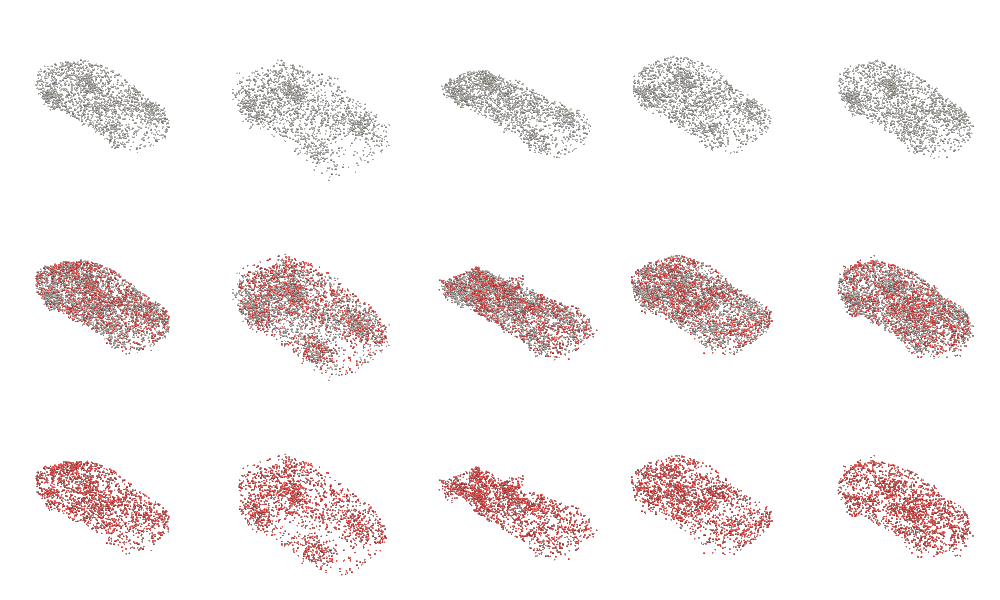

In [7]:
visualize_3d_model("encoder_car",scale=7)


## CNN Encoder Airplane

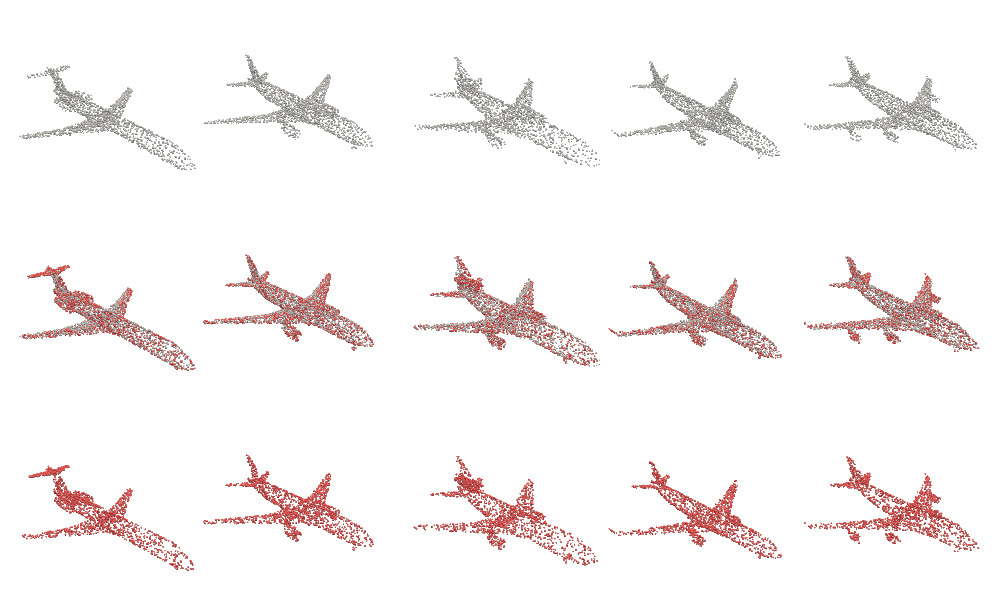

In [8]:
visualize_3d_model("encoder_airplane",scale=10)
